### 한글 워드클라우드
- 한빛 아카데미 > 새로나온 책의 TAG 정보

In [4]:
import requests
from urllib.parse import quote
import pandas as pd
from bs4 import BeautifulSoup
from tqdm import tqdm
from datetime import datetime 

In [5]:
# https://www.hanbit.co.kr/store/books/new_book_list.html?page=1&brand=&cate1=&cate2=&searchKey=&keyWord=
base_url = 'https://www.hanbit.co.kr/academy/books/new_book_list.html?page='
sub_url = 'https://www.hanbit.co.kr/academy/books/book_view.html?p_code='
other_url = '&cate_cd=&srt=&searchKey=&keyWord='
header = {'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/112.0.0.0 Safari/537.36'}
addr_head = 'https://www.hanbit.co.kr' 

In [10]:
lines = []

for page in range(1, 24):
    url = f'{base_url}{page}'
    result = requests.get(url, headers=header)
    soup = BeautifulSoup(result.text, 'html.parser')

    lis = soup.select('li.sub_book_list')
    for li in lis:

        sub_url = addr_head + li.select_one('.pop_quick_bg')['onclick'][10:-1]
        sub_res = requests.get(sub_url)
        sub_soup = BeautifulSoup(sub_res.text, 'html.parser')
        
        # 태그
        tag_info = sub_soup.select('.tag_area > a')
        for a in tag_info:
            lines.append(a.get_text().strip())

       
df2 = pd.DataFrame(lines)
df2.head(20)


,0
0,매트랩
1,MATLAB
2,매트랩 프로그래밍
3,의학통계
4,논문
5,통계
6,분석
7,데이터분석
8,jamovi
9,메타분석


In [11]:
len(lines)

2662

### 2. 워드 클라우드 만들기

In [12]:
from wordcloud import WordCloud, STOPWORDS
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['axes.unicode_minus'] = False


- 태그 리스트(lines)를 frequency dictionary로 만들기

In [13]:
tag_set = set(lines)
len(tag_set)

1425

In [14]:
tag_dict = { item: lines.count(item) for item in tag_set }
# tag_dict = {}
# for item in tag_set:
#   tag_dict[item] = lines.count(item)

In [16]:
count = 0
for key, val in tag_dict.items():
    print(key, ':', val )
    count += 1
    if count > 5: break

 : 1
전기자기학 : 2
파이프라인 : 1
인터넷 뱅킹 : 1
재무회계 : 1
회계처리 : 2


- 워드 클라우드


In [17]:
wc = WordCloud(
    background_color='white',
    random_state=2023
)
wc = wc.generate_from_frequencies(tag_dict)

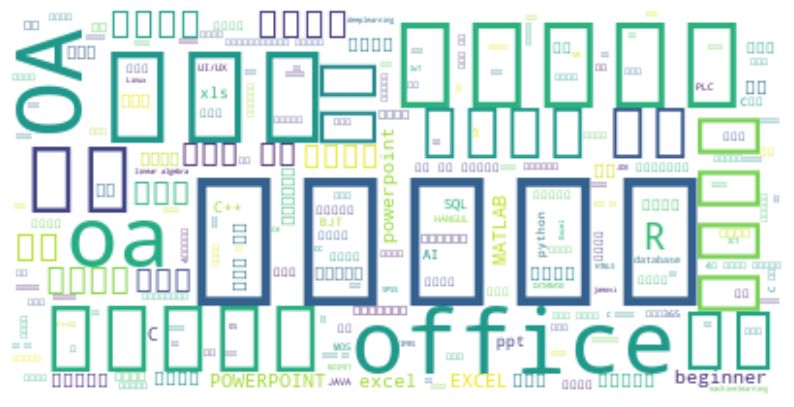

In [21]:
plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


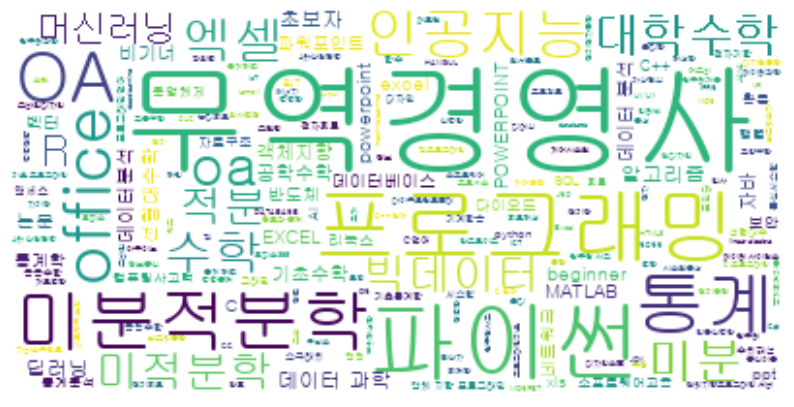

In [22]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF'
).generate_from_frequencies(tag_dict)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

- 태그 단어 리스트를 펼쳐서 문자열로 만든 후 원드 클라우드 만들기

In [23]:
tag_text = ' '.join(lines)
print(tag_text[:100])

매트랩 MATLAB 매트랩 프로그래밍 의학통계 논문 통계 분석 데이터분석 jamovi 메타분석 패널데이터 의사 의학 보건 정보 교육 교과교육론 정보교과교육 SW교육 IT교육 회로 


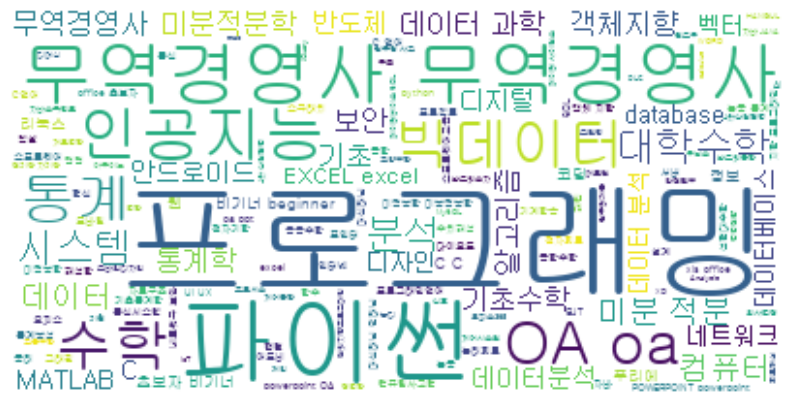

In [24]:
wc = WordCloud(
    background_color='white',
    random_state=2023,
    font_path='C:/Windows/Fonts/NGULIM.TTF'
).generate(tag_text)

plt.figure(figsize=(10, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()